In [3]:
import numpy as np

def iterate_coupledmap(ax, ay, epsi, Nit, x, y):
    lap = 0
    lu = -ax * np.log(ax) - (1 - ax) * np.log(1 - ax)
    La = np.zeros(Nit - 1)
    v = np.zeros(Nit - 1)

    for i in range(Nit - 1):
        fx = x / ax if x <= ax else (1 - x) / (1 - ax)
        fy = y / ay if y <= ay else (1 - y) / (1 - ay)

        x = (1 - epsi) * fx + epsi * fy
        y = epsi * fx + (1 - epsi) * fy

        v[i] = (x - y) / 2
        u = (x + y) / 2
        fd = 1 / ax if u <= ax else 1 / (1 - ax)

        lap += np.log(fd)
        La[i] = (1 / (i + 1)) * lap - lu

    return La, v


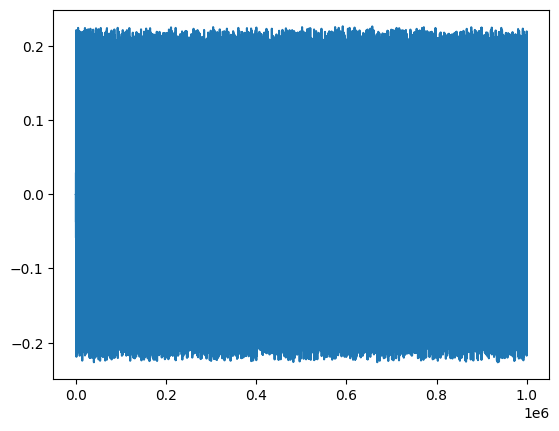

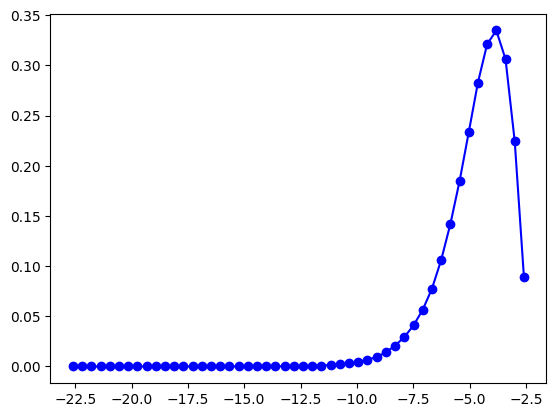

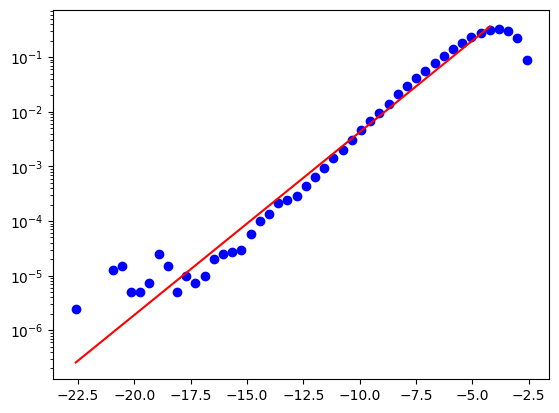

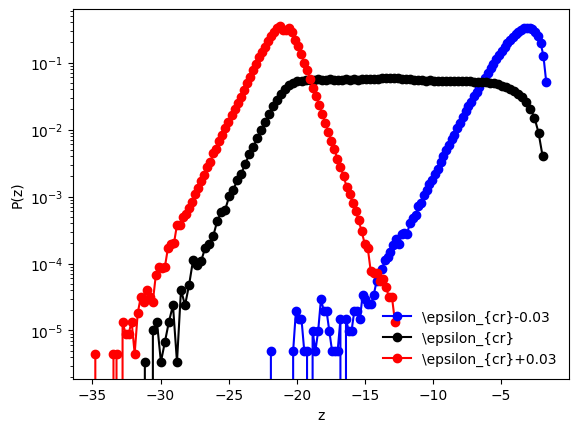

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Define iterate_coupledmap function here

epscr = 0.2285
ax = 0.7
ay = 0.7+1e-9

Nit = int(1e6)
x = 0.5
y = 0.5

epsi = epscr-0.03
Llow, vlow = iterate_coupledmap(ax, ay, epsi, Nit, x, y)
epsi = epscr
Lcri, vcri = iterate_coupledmap(ax, ay, epsi, Nit, x, y)
epsi = epscr+0.03
Lup, vup = iterate_coupledmap(ax, ay, epsi, Nit, x, y)

plt.figure()
plt.plot(vlow)

z = np.log(np.abs(vlow/2))

yn, xn = np.histogram(z, 50)
# yn = yn / np.trapz(yn, xn)

# Calculate the mid-points of the bins
mid_points = xn[:-1] + np.diff(xn) / 2

# Now use mid_points instead of xn in np.trapz
yn = yn / np.trapz(yn, mid_points)

plt.figure()
plt.plot(xn[:-1], yn, '-ob')

ma, am = np.max(yn), np.argmax(yn)
xf = xn[:am]
yf = yn[:am]

xf = xf[yf != 0]
yf = yf[yf != 0]

plt.figure()
plt.semilogy(xn[:-1], yn, 'ob')

p = np.polyfit(xf[3:], np.log(yf[3:]), 1)
plt.semilogy(xf, np.exp(p[1])*np.exp(p[0]*xf), '-r')



yl, xl = np.histogram(np.log(np.abs(vlow)), 100)
# yl = yl / np.trapz(yl, xl)
yc, xc = np.histogram(np.log(np.abs(vcri)), 100)
# yc = yc / np.trapz(yc, xc)
yu, xu = np.histogram(np.log(np.abs(vup)), 100)
# yu = yu / np.trapz(yu, xu)

# Calculate the mid-points of the bins
mid_points_l = xl[:-1] + np.diff(xl) / 2
mid_points_c = xc[:-1] + np.diff(xc) / 2
mid_points_u = xu[:-1] + np.diff(xu) / 2

# Now use mid_points instead of xl, xc, xu in np.trapz
yl = yl / np.trapz(yl, mid_points_l)
yc = yc / np.trapz(yc, mid_points_c)
yu = yu / np.trapz(yu, mid_points_u)


plt.figure()
plt.semilogy(xl[:-1], yl, '-ob', label='\epsilon_{cr}-0.03')
plt.semilogy(xc[:-1], yc, '-ok', label='\epsilon_{cr}')
plt.semilogy(xu[:-1], yu, '-or', label='\epsilon_{cr}+0.03')

plt.ylabel('P(z)')
plt.xlabel('z')

plt.legend(loc='upper left', frameon=False)
plt.legend(frameon=False)

plt.show()